# EDA for dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
df = pd.read_csv('../data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Getting an idea of the distribution for the target varible (sale price)

Text(0.5, 0, 'Price (USD)')

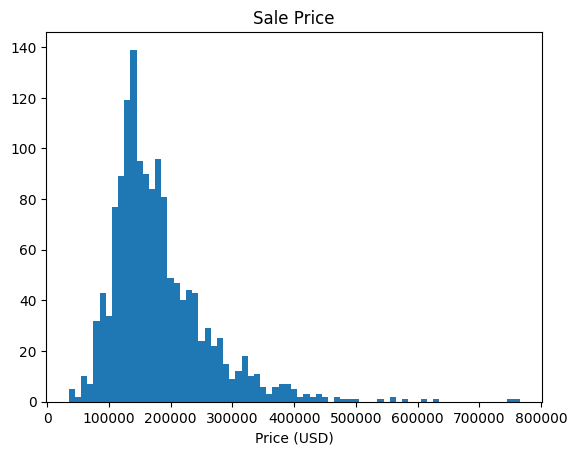

In [194]:
bins = np.arange(df['SalePrice'].min(), df['SalePrice'].max()+10000, 10000)
plt.hist(df['SalePrice'], bins=bins)
plt.title('Sale Price')
plt.xlabel('Price (USD)')

Looking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd36d75d090>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd36d75d310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd36d75cf50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd36d75d590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd36d75d6d0>],
 'means': []}

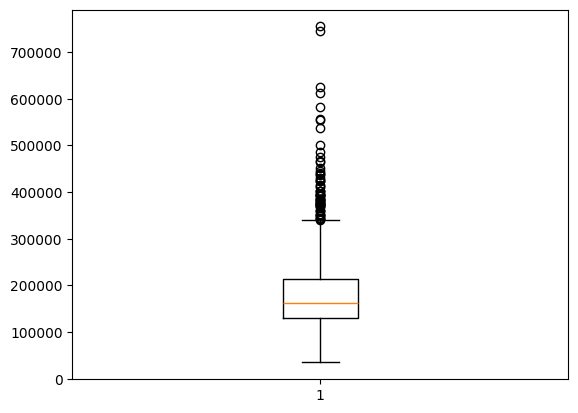

In [195]:
plt.boxplot(df['SalePrice'])

Check columns with most number of null values

In [196]:
missing = df.isnull().mean().sort_values(ascending=False)
missing.head(10)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
dtype: float64

Looking at most correlated variables with sale price

In [199]:
corr = df.corr(numeric_only=True)['SalePrice'].sort_values()
corr.tail(5)
most_corr = corr[-10:-1].index
most_corr

Index(['YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF',
       'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual'],
      dtype='str')

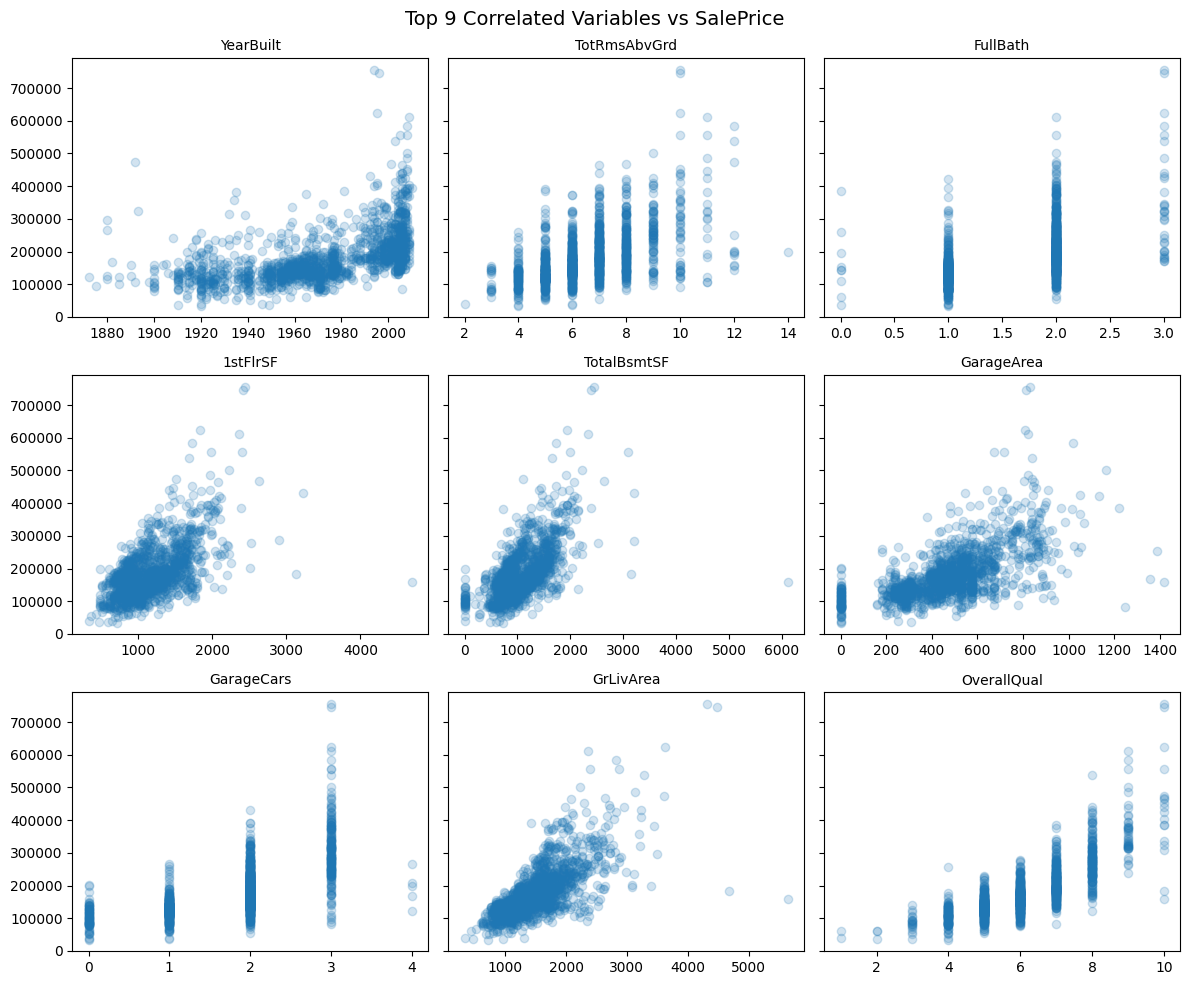

In [198]:
fig, axes = plt.subplots(3,3, figsize=(12,10), sharey=True)
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)

for i in range(len(most_corr)):
    ax = axes[i]
    ax.scatter(data=df, x=most_corr[i], y='SalePrice', alpha=0.2)
    ax.set_title(most_corr[i], fontsize=10)

fig.suptitle("Top 9 Correlated Variables vs SalePrice", fontsize=14)
plt.tight_layout()


Checking an outlier case

In [205]:
outlier_1 = df[(df['1stFlrSF'] > 4000) & (df['SalePrice'] < 300000)]
outlier_1[['TotRmsAbvGrd', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']]

,TotRmsAbvGrd,1stFlrSF,TotalBsmtSF,GrLivArea,SalePrice
1298,12,4692,6110,5642,160000


Dropping outlier

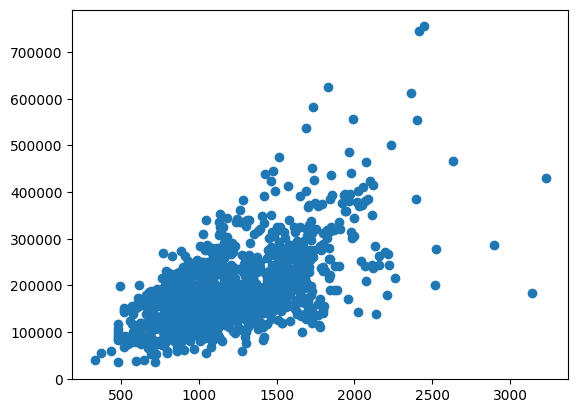

In [206]:
df_cleaned = df.drop(df['1stFlrSF'].idxmax())
plt.scatter(data=df_cleaned, x='1stFlrSF', y='SalePrice')

A few distributions

Text(0.5, 1.0, 'Zoning Area')

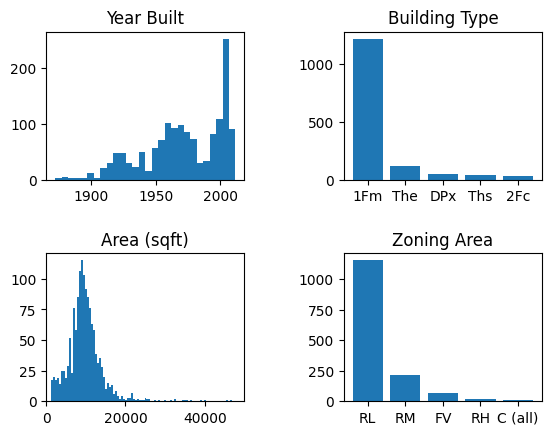

In [207]:
plt.figure()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

bins_yrbt = np.arange(df['YearBuilt'].min(), df['YearBuilt'].max()+5, 5)
plt.subplot(2,2,1)
plt.hist(data=df, x='YearBuilt', bins=bins_yrbt)
plt.title('Year Built')

plt.subplot(2,2,2)
plt.bar(['1Fm', 'The', 'DPx', 'Ths', '2Fc'], df['BldgType'].value_counts().values)
#plt.xticks(rotation=30)
plt.title('Building Type')
#df['BldgType'].value_counts().index 
bins_area = np.arange(df['LotArea'].min(), df['LotArea'].max()+500, 500)
plt.subplot(2,2,3)
plt.hist(data=df, x='LotArea', bins=bins_area)
plt.xlim(0,50000)
plt.title('Area (sqft)')

plt.subplot(2,2,4)
plt.bar(df['MSZoning'].value_counts().index, df['MSZoning'].value_counts().values)
plt.title('Zoning Area')